In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('online.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [38]:
df.shape

(50, 5)

In [39]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

Separate x,y

In [40]:
x = df.drop(['Profit'], axis=1)
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [41]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

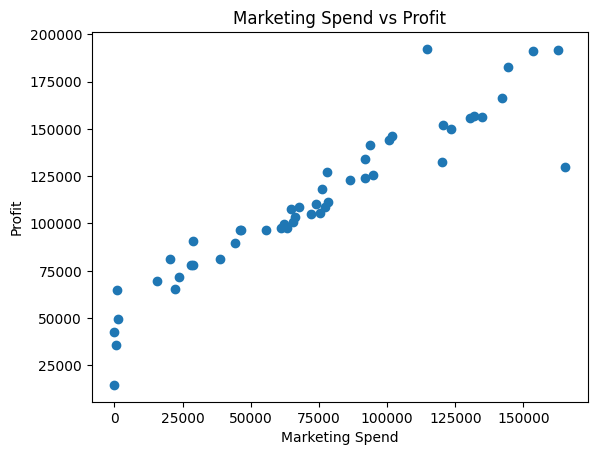

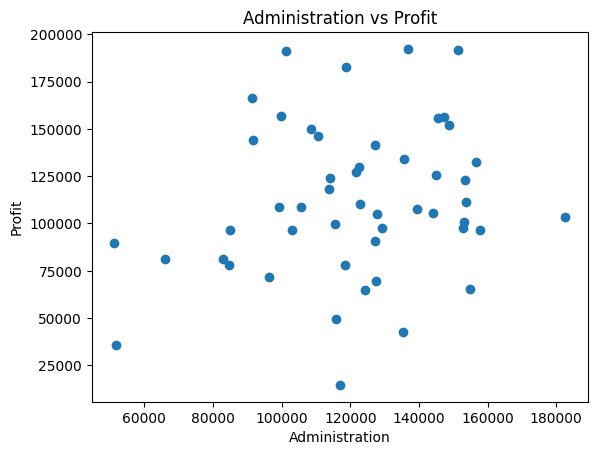

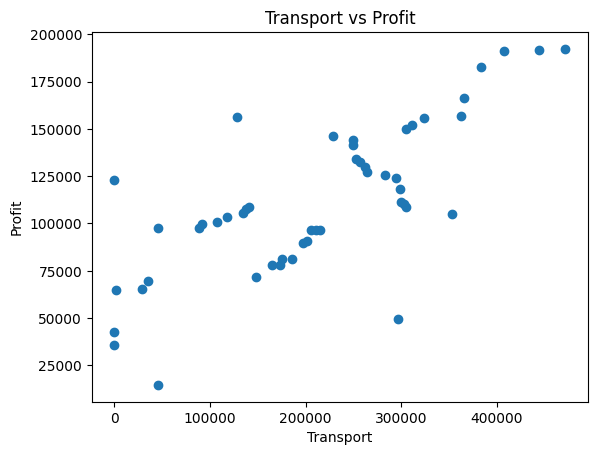

In [42]:
for col in ['Marketing Spend', 'Administration', 'Transport']:
    plt.figure()
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel('Profit')
    plt.title(f'{col} vs Profit')
    plt.show()

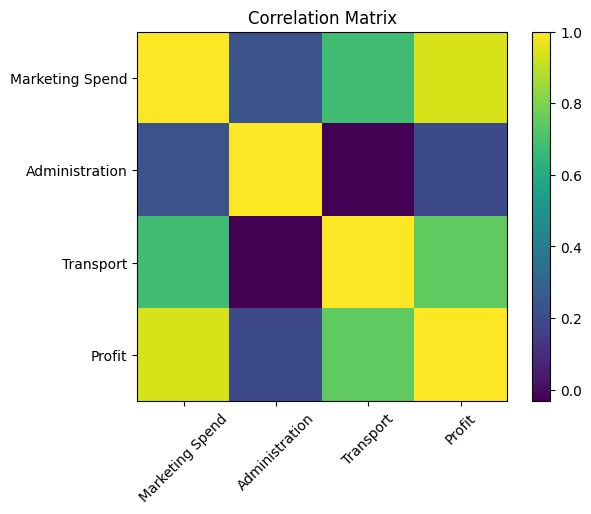

In [43]:
corr = df[['Marketing Spend','Administration','Transport','Profit']].corr()
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [44]:
city = pd.get_dummies(x['Area'], drop_first=True)
city=city.astype(int)
city.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [45]:
# drop 'Area' and concatenate city(one hot encodded city)
x = x.drop(['Area'], axis=1)
x = pd.concat([x, city], axis=1)
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,1,0
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,1,0
4,142107.34,91391.77,366168.42,0,1


Splitting into  train, test 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [49]:
reg.fit(xtrain, ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
ytest.head()

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64

In [51]:
#predicting data
pred = reg.predict(xtest)
pred

array([103501.0825284 , 128011.28068627, 126695.43891127,  70573.91718775,
       173381.96874259, 124238.07860872,  69298.09250304,  98399.41936876,
       116419.1480864 , 161430.98134847,  94740.73303076,  89920.22800514,
       105956.86065332])

In [52]:
reg.score(xtrain, ytrain)

0.8974559535833022

In [53]:
reg.score(xtest, ytest)

0.8840978623923471